In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import io
%matplotlib inline

In [5]:
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

In [6]:
from google.colab import files
 
 
uploaded = files.upload()

Saving heart.csv to heart (3).csv


In [7]:
dataset = pd.read_csv(io.BytesIO(uploaded['heart.csv']))
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
dataset.shape

(303, 14)

In [10]:
pd.set_option("display.float", "{:.2f}".format)
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00
mean,54.37,0.68,0.97,131.62,246.26,0.15,0.53,149.65,0.33,1.04,1.40,0.73,2.31,0.54
std,9.08,0.47,1.03,17.54,51.83,0.36,0.53,22.91,0.47,1.16,0.62,1.02,0.61,0.50
min,29.00,0.00,0.00,94.00,126.00,0.00,0.00,71.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,47.50,0.00,0.00,120.00,211.00,0.00,0.00,133.50,0.00,0.00,1.00,0.00,2.00,0.00
50%,55.00,1.00,1.00,130.00,240.00,0.00,1.00,153.00,0.00,0.80,1.00,0.00,2.00,1.00
75%,61.00,1.00,2.00,140.00,274.50,0.00,1.00,166.00,1.00,1.60,2.00,1.00,3.00,1.00
max,77.00,1.00,3.00,200.00,564.00,1.00,2.00,202.00,1.00,6.20,2.00,4.00,3.00,1.00


In [11]:
dataset.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [12]:
correlation=dataset.corr()
correlation

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.00,-0.10,-0.07,0.28,0.21,0.12,-0.12,-0.40,0.10,0.21,-0.17,0.28,0.07,-0.23
sex,-0.10,1.00,-0.05,-0.06,-0.20,0.05,-0.06,-0.04,0.14,0.10,-0.03,0.12,0.21,-0.28
cp,-0.07,-0.05,1.00,0.05,-0.08,0.09,0.04,0.30,-0.39,-0.15,0.12,-0.18,-0.16,0.43
trestbps,0.28,-0.06,0.05,1.00,0.12,0.18,-0.11,-0.05,0.07,0.19,-0.12,0.10,0.06,-0.14
chol,0.21,-0.20,-0.08,0.12,1.00,0.01,-0.15,-0.01,0.07,0.05,-0.00,0.07,0.10,-0.09
fbs,0.12,0.05,0.09,0.18,0.01,1.00,-0.08,-0.01,0.03,0.01,-0.06,0.14,-0.03,-0.03
restecg,-0.12,-0.06,0.04,-0.11,-0.15,-0.08,1.00,0.04,-0.07,-0.06,0.09,-0.07,-0.01,0.14
thalach,-0.40,-0.04,0.30,-0.05,-0.01,-0.01,0.04,1.00,-0.38,-0.34,0.39,-0.21,-0.10,0.42
exang,0.10,0.14,-0.39,0.07,0.07,0.03,-0.07,-0.38,1.00,0.29,-0.26,0.12,0.21,-0.44
oldpeak,0.21,0.10,-0.15,0.19,0.05,0.01,-0.06,-0.34,0.29,1.00,-0.58,0.22,0.21,-0.43


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


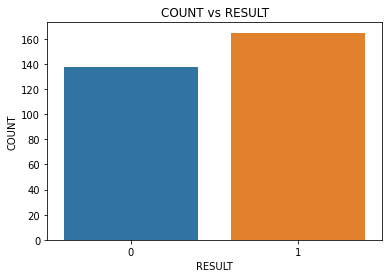

In [13]:
sns.countplot(dataset['target'])
plt.title("COUNT vs RESULT")
plt.xlabel("RESULT")
plt.ylabel("COUNT")
plt.show()

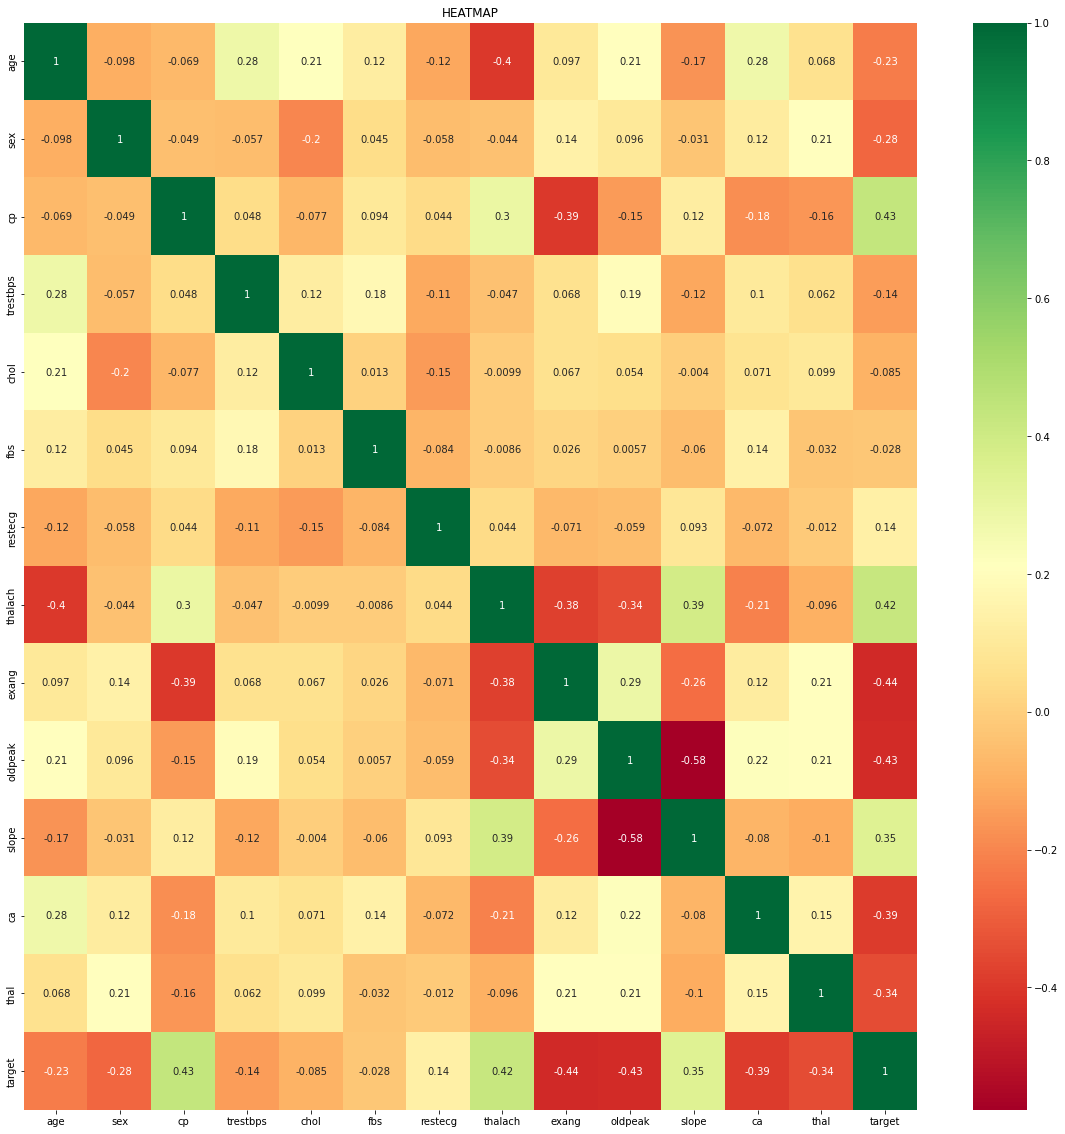

In [14]:
cor=dataset.corr()
top_corr_feature=cor.index
plt.figure(figsize=(20,20))
sns.heatmap(dataset[top_corr_feature].corr(),annot=True,cmap="RdYlGn")
plt.title("HEATMAP")
plt.show()

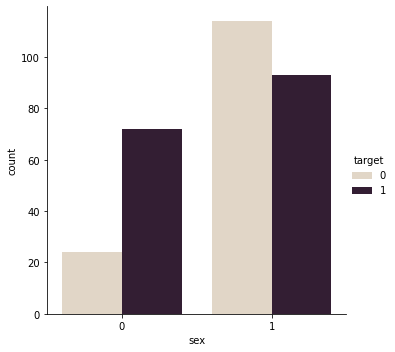

In [18]:
sns.catplot(x = 'sex', kind = 'count', hue = 'target', data= dataset, palette = 'ch:.25')

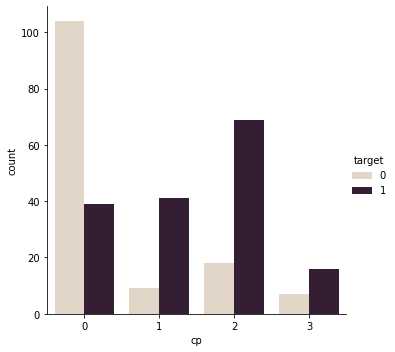

In [23]:
sns.catplot(x = 'cp', kind = 'count', hue = 'target', data= dataset, palette = 'ch:.25')

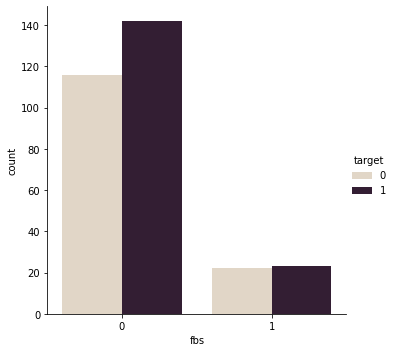

In [24]:
sns.catplot(x = 'fbs', kind = 'count', hue = 'target', data= dataset, palette = 'ch:.25')

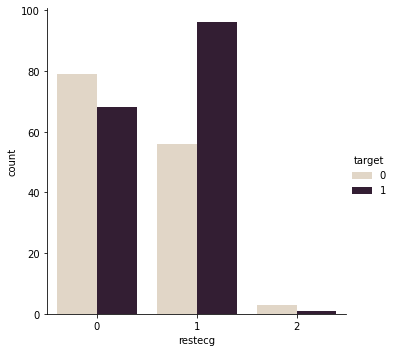

In [26]:
sns.catplot(x = 'restecg', kind = 'count', hue = 'target', data= dataset, palette = 'ch:.25')

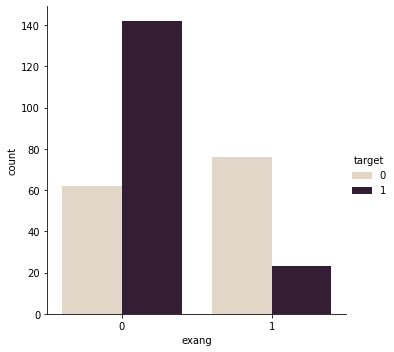

In [27]:
sns.catplot(x = 'exang', kind = 'count', hue = 'target', data= dataset, palette = 'ch:.25')

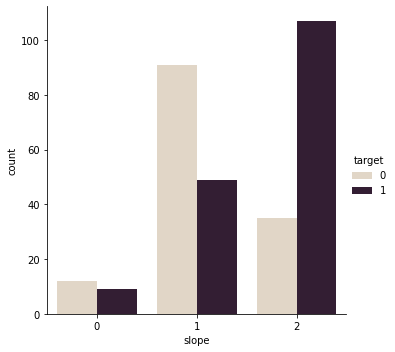

In [29]:
sns.catplot(x = 'slope', kind = 'count', hue = 'target', data= dataset, palette = 'ch:.25')

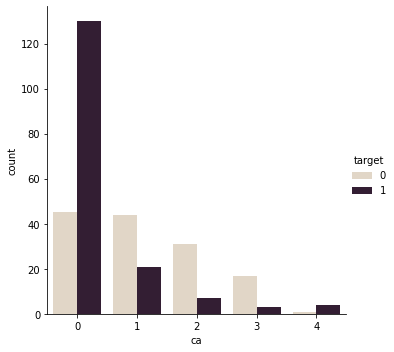

In [30]:
sns.catplot(x = 'ca', kind = 'count', hue = 'target', data= dataset, palette = 'ch:.25')

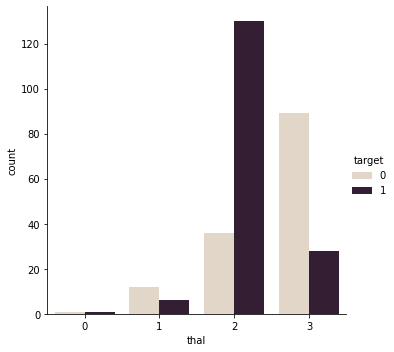

In [31]:
sns.catplot(x = 'thal', kind = 'count', hue = 'target', data= dataset, palette = 'ch:.25')

In [33]:
dataset[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']].describe()

,age,trestbps,chol,thalach,oldpeak
count,303.00,303.00,303.00,303.00,303.00
mean,54.37,131.62,246.26,149.65,1.04
std,9.08,17.54,51.83,22.91,1.16
min,29.00,94.00,126.00,71.00,0.00
25%,47.50,120.00,211.00,133.50,0.00
50%,55.00,130.00,240.00,153.00,0.80
75%,61.00,140.00,274.50,166.00,1.60
max,77.00,200.00,564.00,202.00,6.20


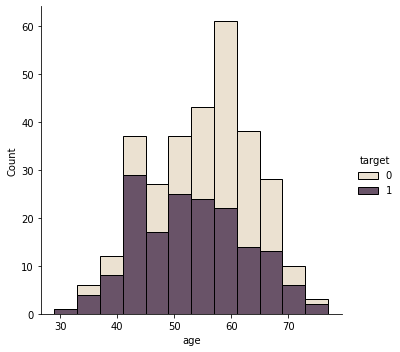

In [34]:
sns.displot(x='age', multiple = 'stack', hue = 'target', data= dataset, palette = 'ch:.25')

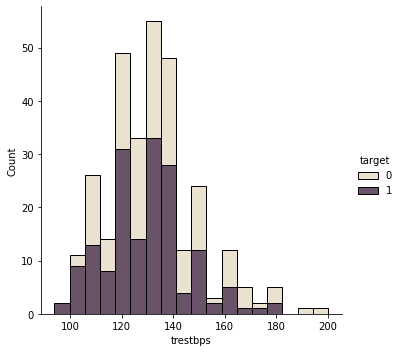

In [35]:
sns.displot(x='trestbps', multiple = 'stack', hue = 'target', data= dataset, palette = 'ch:.25')

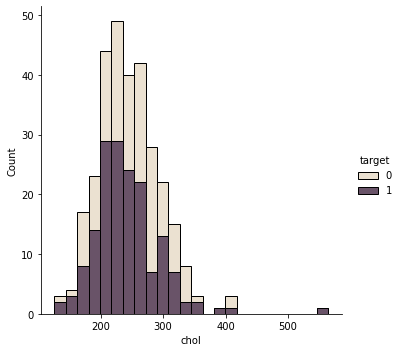

In [36]:
sns.displot(x='chol', multiple = 'stack', hue = 'target', data= dataset, palette = 'ch:.25')

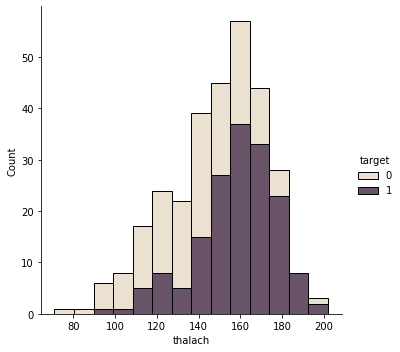

In [37]:
sns.displot(x='thalach', multiple = 'stack', hue = 'target', data= dataset, palette = 'ch:.25')

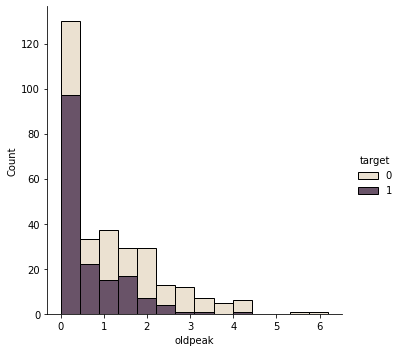

In [38]:
sns.displot(x='oldpeak', multiple = 'stack', hue = 'target', data= dataset, palette = 'ch:.25')

In [42]:
x = dataset.drop('target', axis =1)
y = dataset['target']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 42)
sc = StandardScaler().fit(x_train)
x_train = sc.transform(x_train)
x_test = sc.transform(x_test)

In [43]:
knn = KNeighborsClassifier()
parameters = {'n_neighbors': [3,5,7,9,11], 'weights': ['uniform', 'distance']}
grid = GridSearchCV(knn, parameters, cv = 4, scoring = 'accuracy')
grid.fit(x_train,y_train)

GridSearchCV(cv=4, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9, 11],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [44]:
print(grid.best_params_)

{'n_neighbors': 5, 'weights': 'uniform'}


In [45]:
model = grid.best_estimator_

In [46]:
model.score (x_test,y_test)

0.9016393442622951

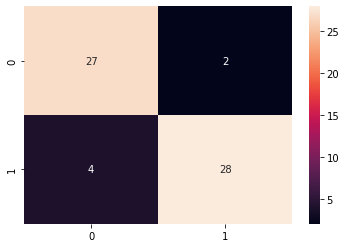

In [47]:
predictions = model.predict(x_test)
cm = metrics.confusion_matrix(y_test, predictions)
cm = pd.DataFrame(cm)
sns.heatmap(cm, annot=True)
plt.show()

In [48]:
TP = 28
FP = 2
TN = 27
FN = 4
sensitivity = TP / (TP + FN) *100
specificity = TN / (TN + FP) * 100
ppv = TP / (TP + FP) * 100
npv = TN / (TN + FN) * 100

In [49]:
print('Sensitivity:', sensitivity,'% ','Specificity:', specificity,'% ','positive predictive value:',ppv,'% ','negative predictive value:',npv,'%' )

Sensitivity: 87.5 %  Specificity: 93.10344827586206 %  positive predictive value: 93.33333333333333 %  negative predictive value: 87.09677419354838 %


In [50]:
probs = model.predict_proba(x_test)[:, 1]
auc = metrics.roc_auc_score(y_test, probs)
print(auc)

0.9154094827586208


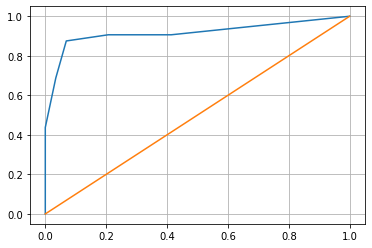

In [51]:
fpr, tpr, _ = metrics.roc_curve(y_test,probs)
plt.figure()
plt.grid()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1])
plt.show()